In [18]:
import welly 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import lasio

In [4]:
log_path = r"C:\Users\Luis Navarro\Desktop\ProgrammingStuff\PetroleumData\Equinor Volve\Integrating Data\WLC_PETRO_COMPUTED_OUTPUT_1.LAS"
plt_path = r"C:\Users\Luis Navarro\Desktop\ProgrammingStuff\PetroleumData\Equinor Volve\Integrating Data\Shutin.LAS"

In [6]:
w_plt = lasio.read(plt_path)
w_plt

In [8]:
w_plt.header
#mnemonic="DATE"

{'Version': [HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STAN...),
  HeaderItem(mnemonic="WRAP", unit="", value="NO", descr="One line per depth s...)],
 'Well': [HeaderItem(mnemonic="STRT", unit="m", value="3480.0", descr="START DEPTH"),
  HeaderItem(mnemonic="STOP", unit="m", value="3910.0", descr="STOP DEPTH"),
  HeaderItem(mnemonic="STEP", unit="m", value="0.5", descr="STEP"),
  HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
  HeaderItem(mnemonic="COMP", unit="", value="Statoil", descr="COMPANY"),
  HeaderItem(mnemonic="WELL", unit="", value="15/9 F-1 C", descr="WELL"),
  HeaderItem(mnemonic="FLD", unit="", value="Volve", descr="FIELD"),
  HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
  HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
  HeaderItem(mnemonic="UWI", unit="", value="", descr="UNIQUE WELL ID"),
  HeaderItem(mnemonic="SRVC", unit="", value="Schlumberger", descr="SERVICE CO...),
  H

In [10]:
w_plt.header['Well']

[HeaderItem(mnemonic="STRT", unit="m", value="3480.0", descr="START DEPTH"),
 HeaderItem(mnemonic="STOP", unit="m", value="3910.0", descr="STOP DEPTH"),
 HeaderItem(mnemonic="STEP", unit="m", value="0.5", descr="STEP"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
 HeaderItem(mnemonic="COMP", unit="", value="Statoil", descr="COMPANY"),
 HeaderItem(mnemonic="WELL", unit="", value="15/9 F-1 C", descr="WELL"),
 HeaderItem(mnemonic="FLD", unit="", value="Volve", descr="FIELD"),
 HeaderItem(mnemonic="LOC", unit="", value="", descr="LOCATION"),
 HeaderItem(mnemonic="PROV", unit="", value="", descr="PROVINCE"),
 HeaderItem(mnemonic="UWI", unit="", value="", descr="UNIQUE WELL ID"),
 HeaderItem(mnemonic="SRVC", unit="", value="Schlumberger", descr="SERVICE CO...),
 HeaderItem(mnemonic="DATE", unit="", value="05-04-2018", descr="DATE")]

In [12]:
plt_date = w_plt.header['Well'][-1].value
plt_date = '01-11-2014'

In [13]:
w_plt.keys()

['DEPT',
 'C1C2',
 'QOZI',
 'QOZT',
 'QTZT',
 'QWZI',
 'QWZT',
 'VASPIN',
 'VASPINZ',
 'WPRE',
 'WTEP',
 'YW_FLV',
 'YW_FLVZ',
 'INFL_Z']

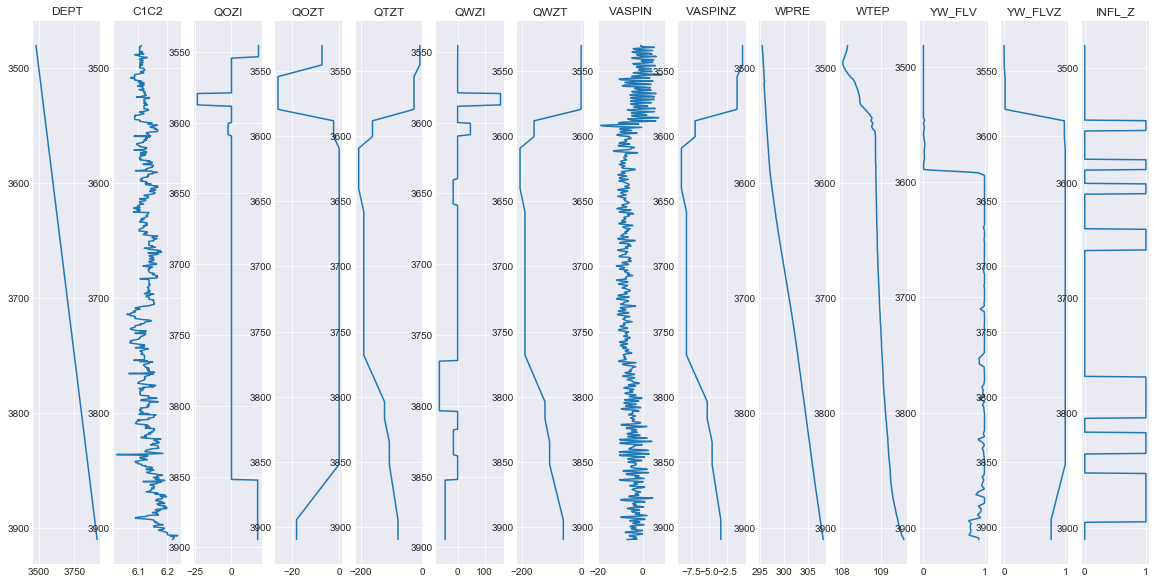

In [20]:
fig,axes = plt.subplots(1,len(w_plt.keys()), figsize=(20,10))
for i,log in enumerate(w_plt.keys()):
    axes[i].plot(w_plt[log],w_plt['DEPT'])
    axes[i].invert_yaxis()
    axes[i].set_title(log)
    
#

In [22]:
w_log = welly.Well.from_las(log_path)
w_log

Well(uwi: '', 9 curves: ['BADDATA_FLAG', 'BVW', 'COAL_FLAG', 'KLOGH', 'PHIF', 'SAND_FLAG', 'SW', 'VCARB', 'VSH'])

In [23]:
w_log.data

{'BADDATA_FLAG': Curve([ 0.,  0.,  0., ..., nan, nan, nan]),
 'BVW': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'COAL_FLAG': Curve([nan, nan, nan, ...,  0.,  0.,  0.]),
 'KLOGH': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'PHIF': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'SAND_FLAG': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'SW': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'VCARB': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'VSH': Curve([nan, nan, nan, ..., nan, nan, nan])}

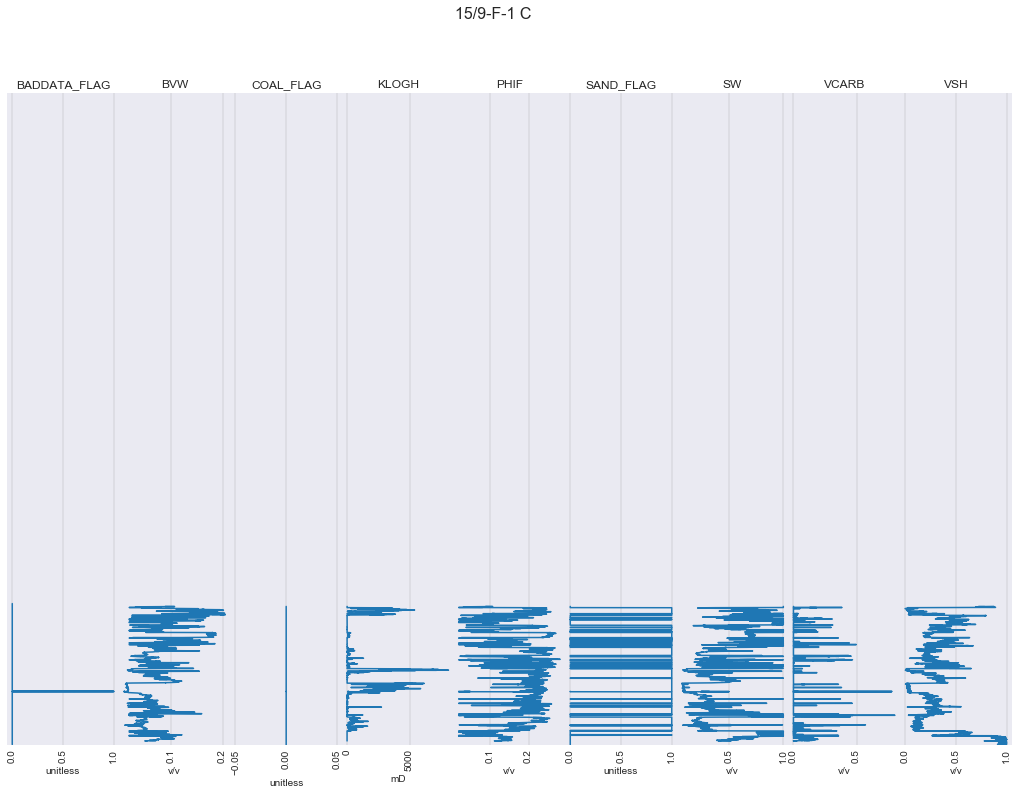

In [25]:
w_log.plot()

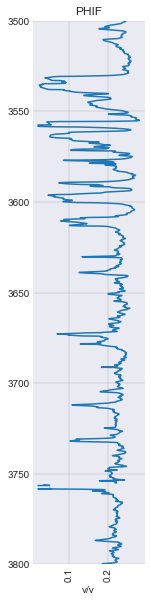

In [27]:
segment_phi = w_log.data["PHIF"].to_basis(start = 3500,stop = 3800)
segment_phi.plot()

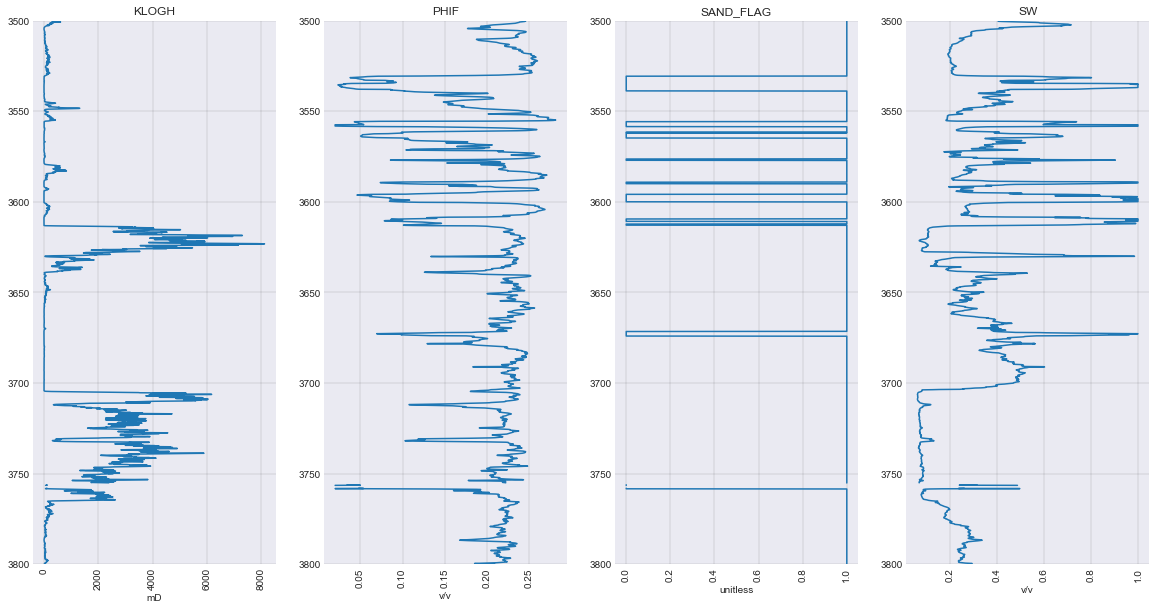

In [28]:
to_plot = ["KLOGH","PHIF","SAND_FLAG","SW"]

fig,axes = plt.subplots(1,len(to_plot), figsize=(20,10))
for i,plot in enumerate(to_plot):
    segment = w_log.data[plot].to_basis(start = 3500,stop = 3800)
    segment.plot(ax=axes[i])
    


In [39]:
import tabula

In [31]:
press_path = r"C:\Users\Luis Navarro\Desktop\ProgrammingStuff\PetroleumData\Equinor Volve\Integrating Data\FM_PRESS_RAW_RUN4_MWD_REPORT_1.pdf"

In [37]:
table = tabula.read_pdf(press_path,pages ='5',silent = True)

In [38]:
table[0]

,Station\r#,Date\rDD.MM.YY,Time\rHH:MM:SS,MD\r[m],TVD\r[m],APresA\r[bara],FPres1\r[bara],FPres2\r[bara],FPres3\r[bara],Mob1\r[mD/cP],Mob2\r[mD/cP],Mob3\r[mD/cP]
0,1,14.03.14,21:54:17,3977.0,3138.7,447.0,354.6,354.6,354.6,125.1,142.2,148.6
1,2,14.03.14,22:39:37,3925.1,3120.2,445.0,353.2,353.2,353.2,73.2,80.8,84.1
2,3,14.03.14,23:13:04,3858.0,3096.5,441.2,352.2,352.2,352.2,32.9,34.5,35.4
3,4,14.03.14,23:40:21,3823.1,3084.8,439.3,351.0,351.0,351.0,8.4,8.0,7.9
4,5,15.03.14,00:11:09,3768.1,3067.0,436.4,349.5,349.5,349.5,180.5,253.0,270.3
5,6,15.03.14,00:36:35,3739.9,3057.6,435.4,348.8,348.8,348.8,501.6,580.2,610.4
6,7,15.03.14,01:04:55,3720.1,3050.6,434.1,348.3,348.3,348.3,227.8,312.5,322.8
7,8,15.03.14,01:44:52,3620.2,3012.3,429.1,344.4,344.4,344.4,291.1,550.3,576.7
8,9,15.03.14,02:14:19,3603.0,3006.7,426.7,345.4,345.4,345.4,52.7,70.6,77.6
9,10,15.03.14,02:42:03,3551.1,2992.9,423.1,341.5,341.5,341.5,86.5,94.9,95.9


In [74]:
w_press_df = table[0]

In [44]:
#make both files to same fram of reference, output LAS file has meassure every meter, pressure doesnt

In [49]:
#Plotting function 
def plotting_func(start,stop,to_plot):
    fig,axes = plt.subplots(1,len(to_plot), figsize=(20,10))
    for i,plot in enumerate(to_plot):
        segment = w_log.data[plot].to_basis(start = start,stop = stop)
        if plot=="SAND_FLAG":
            segment.plot_2d(ax=axes[i])
        else:
            segment.plot(ax=axes[i])
        axes[i].set_title(plot)

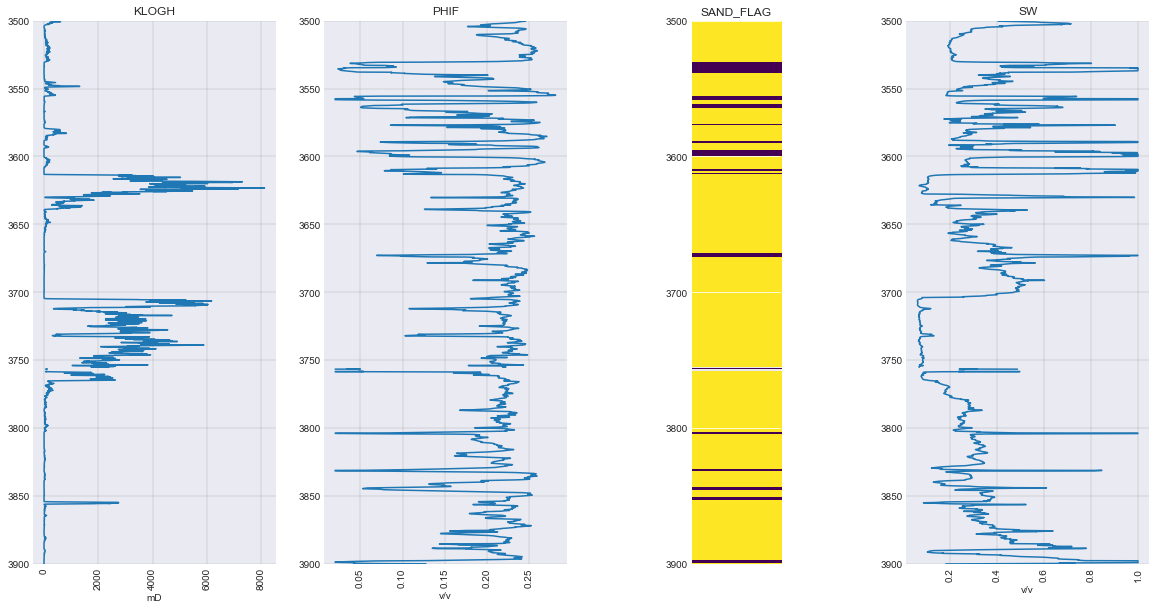

In [50]:
to_plot_int = ["KLOGH","PHIF","SAND_FLAG","SW"]
plotting_func(3500,3900,to_plot_int)

In [51]:
w_plt["QOZI"]

array([      nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan, 

In [52]:
w_plt["QOZI"]
plt_qozi = [0.0 if np.isnan(x) else x for x in w_plt["QOZI"]]

In [57]:
w_log.data["PLT - QOZI"] = welly.Curve(plt_qozi)

In [58]:
#the reference, depth is wrong, goes from o to len
w_log.data["PLT - QOZI"]

Curve([  0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,  18.66556,
        18.66556,  18.66556,  18.66556,  18.66556,  18.66556,  18.66556,
        18.66556,  18.66556,  18.66556,  18.66556,  18.66556,  18.66556,
        18.66556,  18.66556,  18.66556,  18.66556,   9.33278,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     , -23.60075, -23.60075, -23.60075, -23.60075, -23.60075,
       -23.60075, -23.60075, -23.60075, -23.60075, -23.60075, -23.60075,
       -23.60075, -23.60075, -23.60075, -23.60075, -23.60075, -23.60075,
       -11.80037,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,  -2.35285,  -2.35285,  -2.35285,  -2.35285,  -2.35285,
        -2.35285,  -2.35285,  -2.35285,  -2.35285,  -2.35285,  -2.35285,
        -2.35285,  -2.35285,  -2.35285,  -2.35285,  -2.35285,  -2.35285,
        -1.17642,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   0.     ,   0.     ,   0.     ,   0.   

In [60]:
len(w_plt["DEPT"])

861

In [64]:
w_log = welly.Well.from_las(log_path)

C:\ProgramData\Anaconda3\lib\site-packages\welly\well.py:192: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)


In [66]:
#Depth as index of welly file
w_log_df = w_log.df()
w_log_df

,BADDATA_FLAG,BVW,COAL_FLAG,KLOGH,PHIF,SAND_FLAG,SW,VCARB,VSH
Depth,,,,,,,,,
3205.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3205.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3205.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3205.3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3205.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4093.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4093.5,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4093.6,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
#interpolate depth and values
#np.interp(x=depth,xp=produccion log, fp=actual value)
plt_qozi_interp = np.interp(w_log_df.index.values,w_plt["DEPT"] ,plt_qozi)

In [68]:
len(plt_qozi_interp)

8889

In [69]:
w_log.data["PLT-QOZI"] = welly.Curve(plt_qozi_interp)

In [70]:
w_log.data["PLT-QOZI"]

Curve([0., 0., 0., ..., 0., 0., 0.])

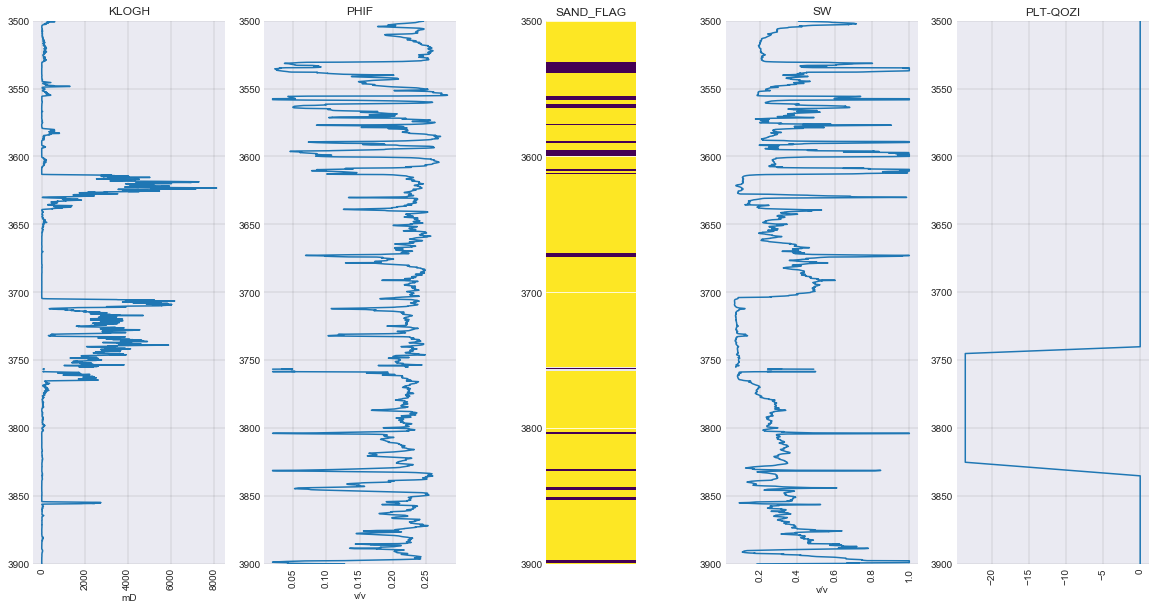

In [71]:
to_plot_int = ["KLOGH","PHIF","SAND_FLAG","SW","PLT-QOZI"]
plotting_func(3500,3900,to_plot_int)

In [76]:
#MD &  FPres3
w_press_df

,Station\r#,Date\rDD.MM.YY,Time\rHH:MM:SS,MD\r[m],TVD\r[m],APresA\r[bara],FPres1\r[bara],FPres2\r[bara],FPres3\r[bara],Mob1\r[mD/cP],Mob2\r[mD/cP],Mob3\r[mD/cP]
0,1,14.03.14,21:54:17,3977.0,3138.7,447.0,354.6,354.6,354.6,125.1,142.2,148.6
1,2,14.03.14,22:39:37,3925.1,3120.2,445.0,353.2,353.2,353.2,73.2,80.8,84.1
2,3,14.03.14,23:13:04,3858.0,3096.5,441.2,352.2,352.2,352.2,32.9,34.5,35.4
3,4,14.03.14,23:40:21,3823.1,3084.8,439.3,351.0,351.0,351.0,8.4,8.0,7.9
4,5,15.03.14,00:11:09,3768.1,3067.0,436.4,349.5,349.5,349.5,180.5,253.0,270.3
5,6,15.03.14,00:36:35,3739.9,3057.6,435.4,348.8,348.8,348.8,501.6,580.2,610.4
6,7,15.03.14,01:04:55,3720.1,3050.6,434.1,348.3,348.3,348.3,227.8,312.5,322.8
7,8,15.03.14,01:44:52,3620.2,3012.3,429.1,344.4,344.4,344.4,291.1,550.3,576.7
8,9,15.03.14,02:14:19,3603.0,3006.7,426.7,345.4,345.4,345.4,52.7,70.6,77.6
9,10,15.03.14,02:42:03,3551.1,2992.9,423.1,341.5,341.5,341.5,86.5,94.9,95.9


In [77]:
w_press_df["FPres3\r[bara]"]

0     354.6
1     353.2
2     352.2
3     351.0
4     349.5
5     348.8
6     348.3
7     344.4
8     345.4
9     341.5
10    341.0
11    340.4
12    338.2
Name: FPres3\r[bara], dtype: float64

In [79]:
press_mwd_interp = np.interp(w_log_df.index.values, w_press_df["TVD\r[m]"],w_press_df["FPres3\r[bara]"])
w_log.data["MWD_PRESS"] = welly.Curve(press_mwd_interp)

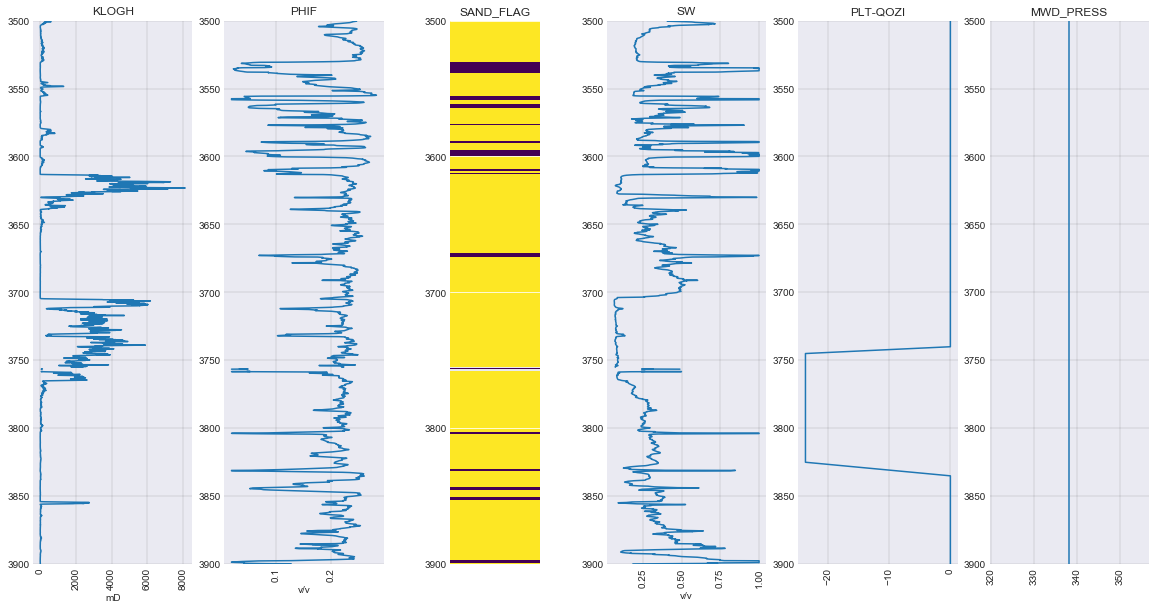

In [80]:
to_plot_int = ["KLOGH","PHIF","SAND_FLAG","SW","PLT-QOZI","MWD_PRESS"]
plotting_func(3500,3900,to_plot_int)

In [81]:
from ipywidgets import *

In [82]:
to_plot_int = ["KLOGH","PHIF","SAND_FLAG","SW","PLT-QOZI","MWD_PRESS"]
@interact
def modify_depth_range(min_depth =(3000,3900,1),max_depth =(3000,3900,1)):
    return plotting_func(min_depth,max_depth,to_plot_int)

interactive(children=(IntSlider(value=3450, description='min_depth', max=3900, min=3000), IntSlider(value=3450…

In [83]:
import warnings
warnings.filterwarnings('ignore')

interactive(children=(IntSlider(value=3450, description='min_depth', max=3900, min=3000), IntSlider(value=3450…

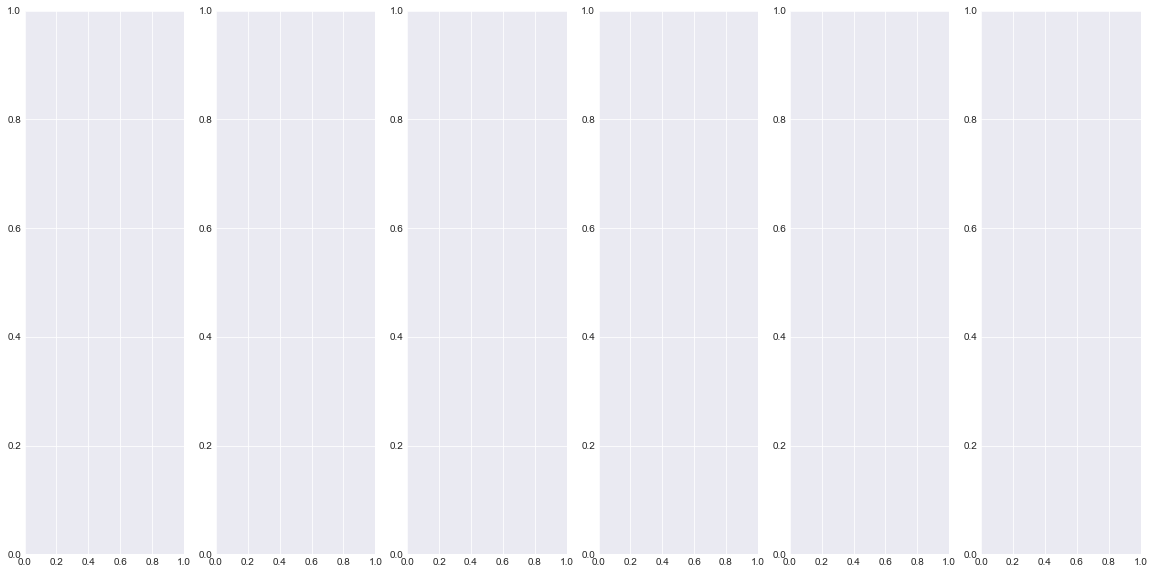

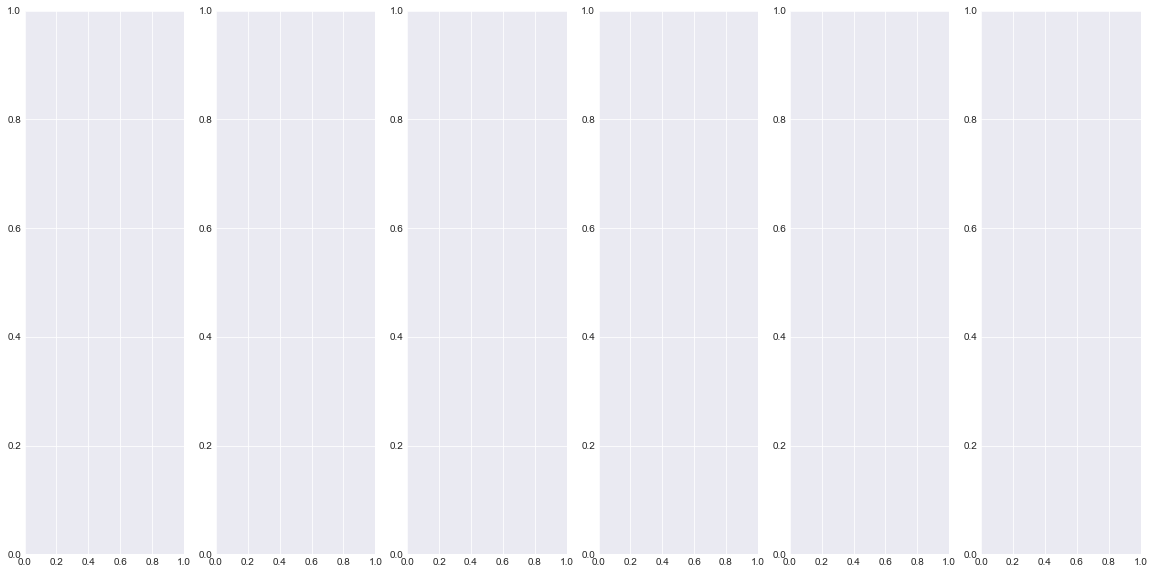

In [84]:
to_plot_int = ["KLOGH","PHIF","SAND_FLAG","SW","PLT-QOZI","MWD_PRESS"]
@interact
def modify_depth_range(min_depth =(3000,3900,1),max_depth =(3000,3900,1)):
    return plotting_func(min_depth,max_depth,to_plot_int)